In [519]:
import numpy as np
import pandas as pd

In [520]:
data = pd.read_csv("../datasets/cbecs2018_final_public.csv")

In [521]:

cat_cols = ["DATACNTR", "TRNGRM", "STDNRM", "LGOFFDEV", "SMOFFDEV", "SERVER", "LAPTOP", "RFGSTO", "ELCOOL","GOVOWN", "PVC", "DCNTRSFC" ]
cont_cols = ["PCTERMN", "LAPTPN", "TABLETN","SERVERN", "LGOFFDEVN", "SMOFFDEVN", "WBOARDSN", "COOLP", "ELEXP"]
columns =  cat_cols + cont_cols

In [522]:
def show_unique_values(df, cat_cols):
        """
        Prints the unique values for each categorical column in the DataFrame.
        
        Args:
        - df: DataFrame to inspect.
        - cat_cols: List of categorical column names.
        """
        print("-----------------[ Unique Values in Categorical Columns ]-----------------")
        for col in cat_cols:
            unique_vals = df[col].dropna().unique()  # Drop NaN values to exclude them
            print(f"{col}: {unique_vals.tolist()}")
            print(f"Total Unique (excluding NaN): {len(unique_vals)}\n")
def dataSummary(df, cat_cols, cont_cols):
    print("------------------------[ Shape ]------------------------\n", df.shape)
    print("------------------------[ Head ]------------------------\n",df.head)
    print("------------------------[ Columns ]------------------------\n",df.columns)
    print("------------------------[ describe ]------------------------\n",df.describe())
    missing_values = df.isnull().sum()
    print("------------------------[ Missing ]------------------------\n", missing_values)
    unique_counts = df.apply(lambda col: col.nunique(dropna=True))
    print("------------------------[ Unique Count ]------------------------\n", unique_counts)
    show_unique_values(df,cat_cols)
    
    
dataSummary(data[columns], cat_cols, cont_cols)
df = data[columns]

------------------------[ Shape ]------------------------
 (6436, 21)
------------------------[ Head ]------------------------
 <bound method NDFrame.head of       DATACNTR  TRNGRM  STDNRM  LGOFFDEV  SMOFFDEV  SERVER  LAPTOP  RFGSTO  \
0          1.0     2.0     2.0       1.0       2.0     1.0     1.0     2.0   
1          2.0     2.0     2.0       1.0       1.0     1.0     1.0     2.0   
2          2.0     2.0     2.0       2.0       1.0     1.0     1.0     2.0   
3          2.0     2.0     2.0       2.0       1.0     1.0     1.0     2.0   
4          2.0     2.0     2.0       2.0       1.0     2.0     2.0     2.0   
...        ...     ...     ...       ...       ...     ...     ...     ...   
6431       2.0     1.0     1.0       1.0       1.0     1.0     1.0     2.0   
6432       NaN     NaN     NaN       NaN       NaN     NaN     NaN     NaN   
6433       2.0     2.0     2.0       2.0       2.0     1.0     1.0     2.0   
6434       2.0     2.0     1.0       1.0       1.0     2.0    

In [509]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


def round_to_nearest_category(df, cat_cols, category_map):
    """
    Rounds imputed values in categorical columns to the nearest valid category.
    
    Args:
    - df: DataFrame with imputed values.
    - cat_cols: List of categorical column names.
    - category_map: Dictionary with column names as keys and valid categories as values.
    
    Returns:
    - DataFrame with corrected categorical columns.
    """
    for col in cat_cols:
        valid_categories = np.array(category_map[col])
        # Replace values with the nearest valid category
        df[col] = df[col].apply(lambda x: valid_categories[np.abs(valid_categories - x).argmin()])
    return df

def DataPreProcessing(df, cat_cols, cont_cols, category_map):
    # Drop rows with missing target variable
    df = df.dropna(subset=['ELEXP']).copy()

    # Handle outliers in continuous columns
    df = handle_outliers(df, cont_cols)

    # Impute missing values using KNNImputer
    imputer = KNNImputer(n_neighbors=5)
    df_imputed = pd.DataFrame(imputer.fit_transform(df[cat_cols + cont_cols]), columns=cat_cols + cont_cols)

    # Correct categorical columns by rounding to the nearest category
    df_imputed = round_to_nearest_category(df_imputed, cat_cols, category_map)

    # Normalize continuous columns
    # scaler = MinMaxScaler()
    scaler = StandardScaler()
    
    df_imputed[cont_cols] = scaler.fit_transform(df_imputed[cont_cols])

    return df_imputed, scaler

# Example usage:
# Define category_map: valid categories for each categorical column
category_map = {

    "DATACNTR": [1.0, 2.0],    
    "TRNGRM": [2.0, 1.0],    
    "STDNRM": [2.0, 1.0],    
    "LGOFFDEV": [1.0, 2.0],    
    "SMOFFDEV": [2.0, 1.0],    
    "SERVER": [1.0, 2.0],    
    "LAPTOP": [1.0, 2.0],    
    "RFGSTO": [2.0, 1.0],    
    "ELCOOL": [1, 2],    
    "GOVOWN": [1, 2],
    "PVC": [2.0, 1.0],
    "DCNTRSFC": [4.0, 1.0, 2.0, 5.0, 3.0]
}

# Assuming `df`, `cat_cols`, and `cont_cols` are predefined
df_imputed, scaler = DataPreProcessing(df, cat_cols, cont_cols, category_map)
dataSummary(df_imputed, cat_cols, cont_cols)

------------------------[ Shape ]------------------------
 (6357, 21)
------------------------[ Head ]------------------------
 <bound method NDFrame.head of       DATACNTR  TRNGRM  STDNRM  LGOFFDEV  SMOFFDEV  SERVER  LAPTOP  RFGSTO  \
0          1.0     2.0     2.0       1.0       2.0     1.0     1.0     2.0   
1          2.0     2.0     2.0       1.0       1.0     1.0     1.0     2.0   
2          2.0     2.0     2.0       2.0       1.0     1.0     1.0     2.0   
3          2.0     2.0     2.0       2.0       1.0     1.0     1.0     2.0   
4          2.0     2.0     2.0       2.0       1.0     2.0     2.0     2.0   
...        ...     ...     ...       ...       ...     ...     ...     ...   
6352       2.0     2.0     2.0       2.0       1.0     1.0     1.0     2.0   
6353       2.0     1.0     1.0       1.0       1.0     1.0     1.0     2.0   
6354       2.0     2.0     2.0       2.0       2.0     1.0     1.0     2.0   
6355       2.0     2.0     1.0       1.0       1.0     2.0    

Shape of the data after removing outliers: (763, 21)


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

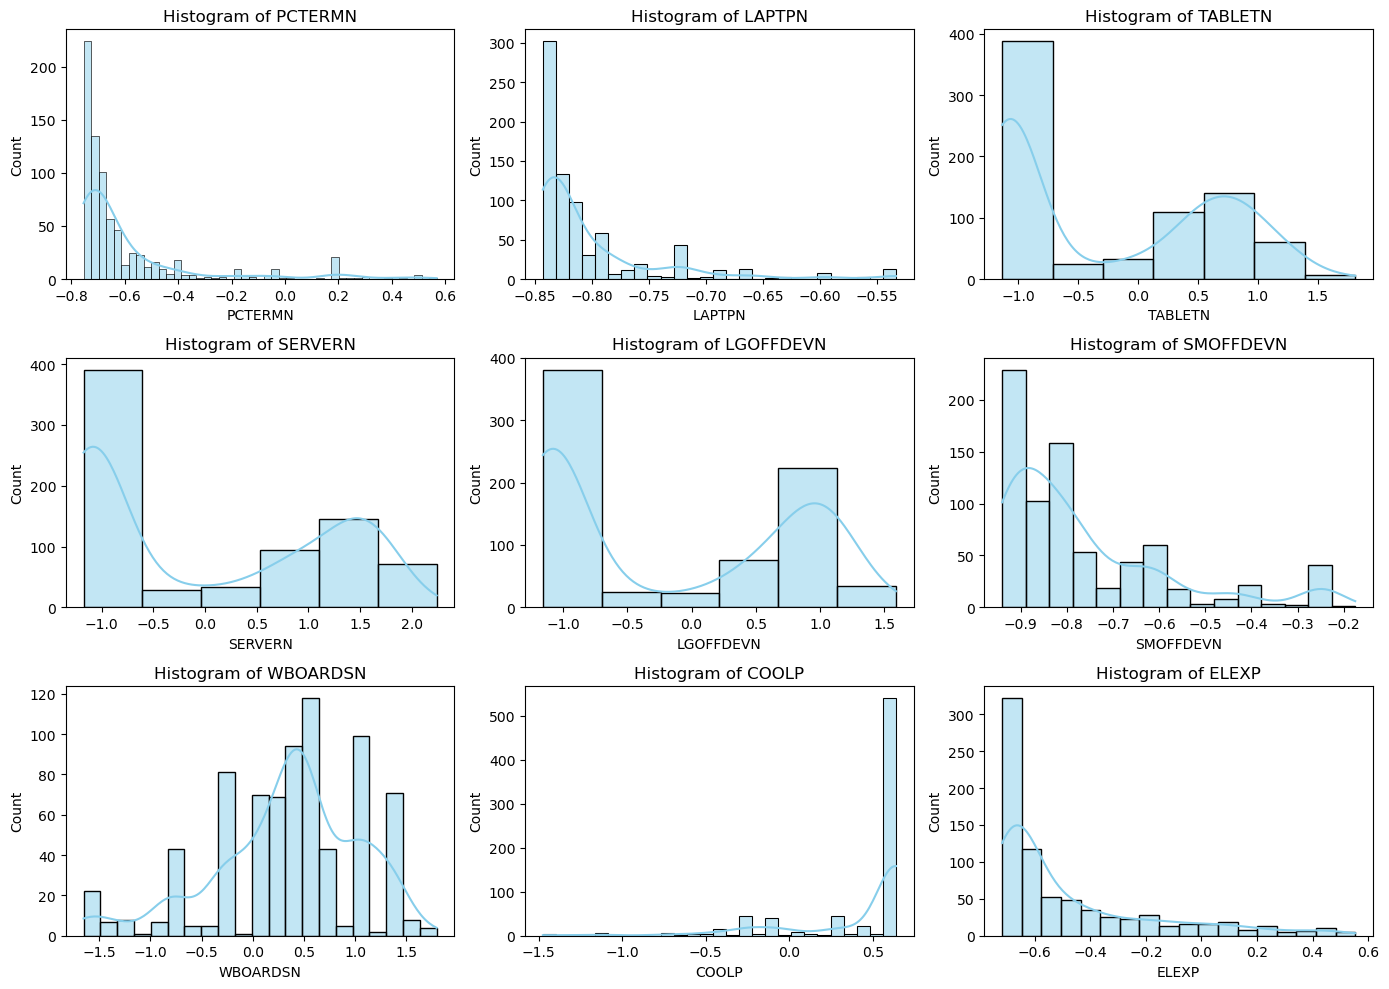

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

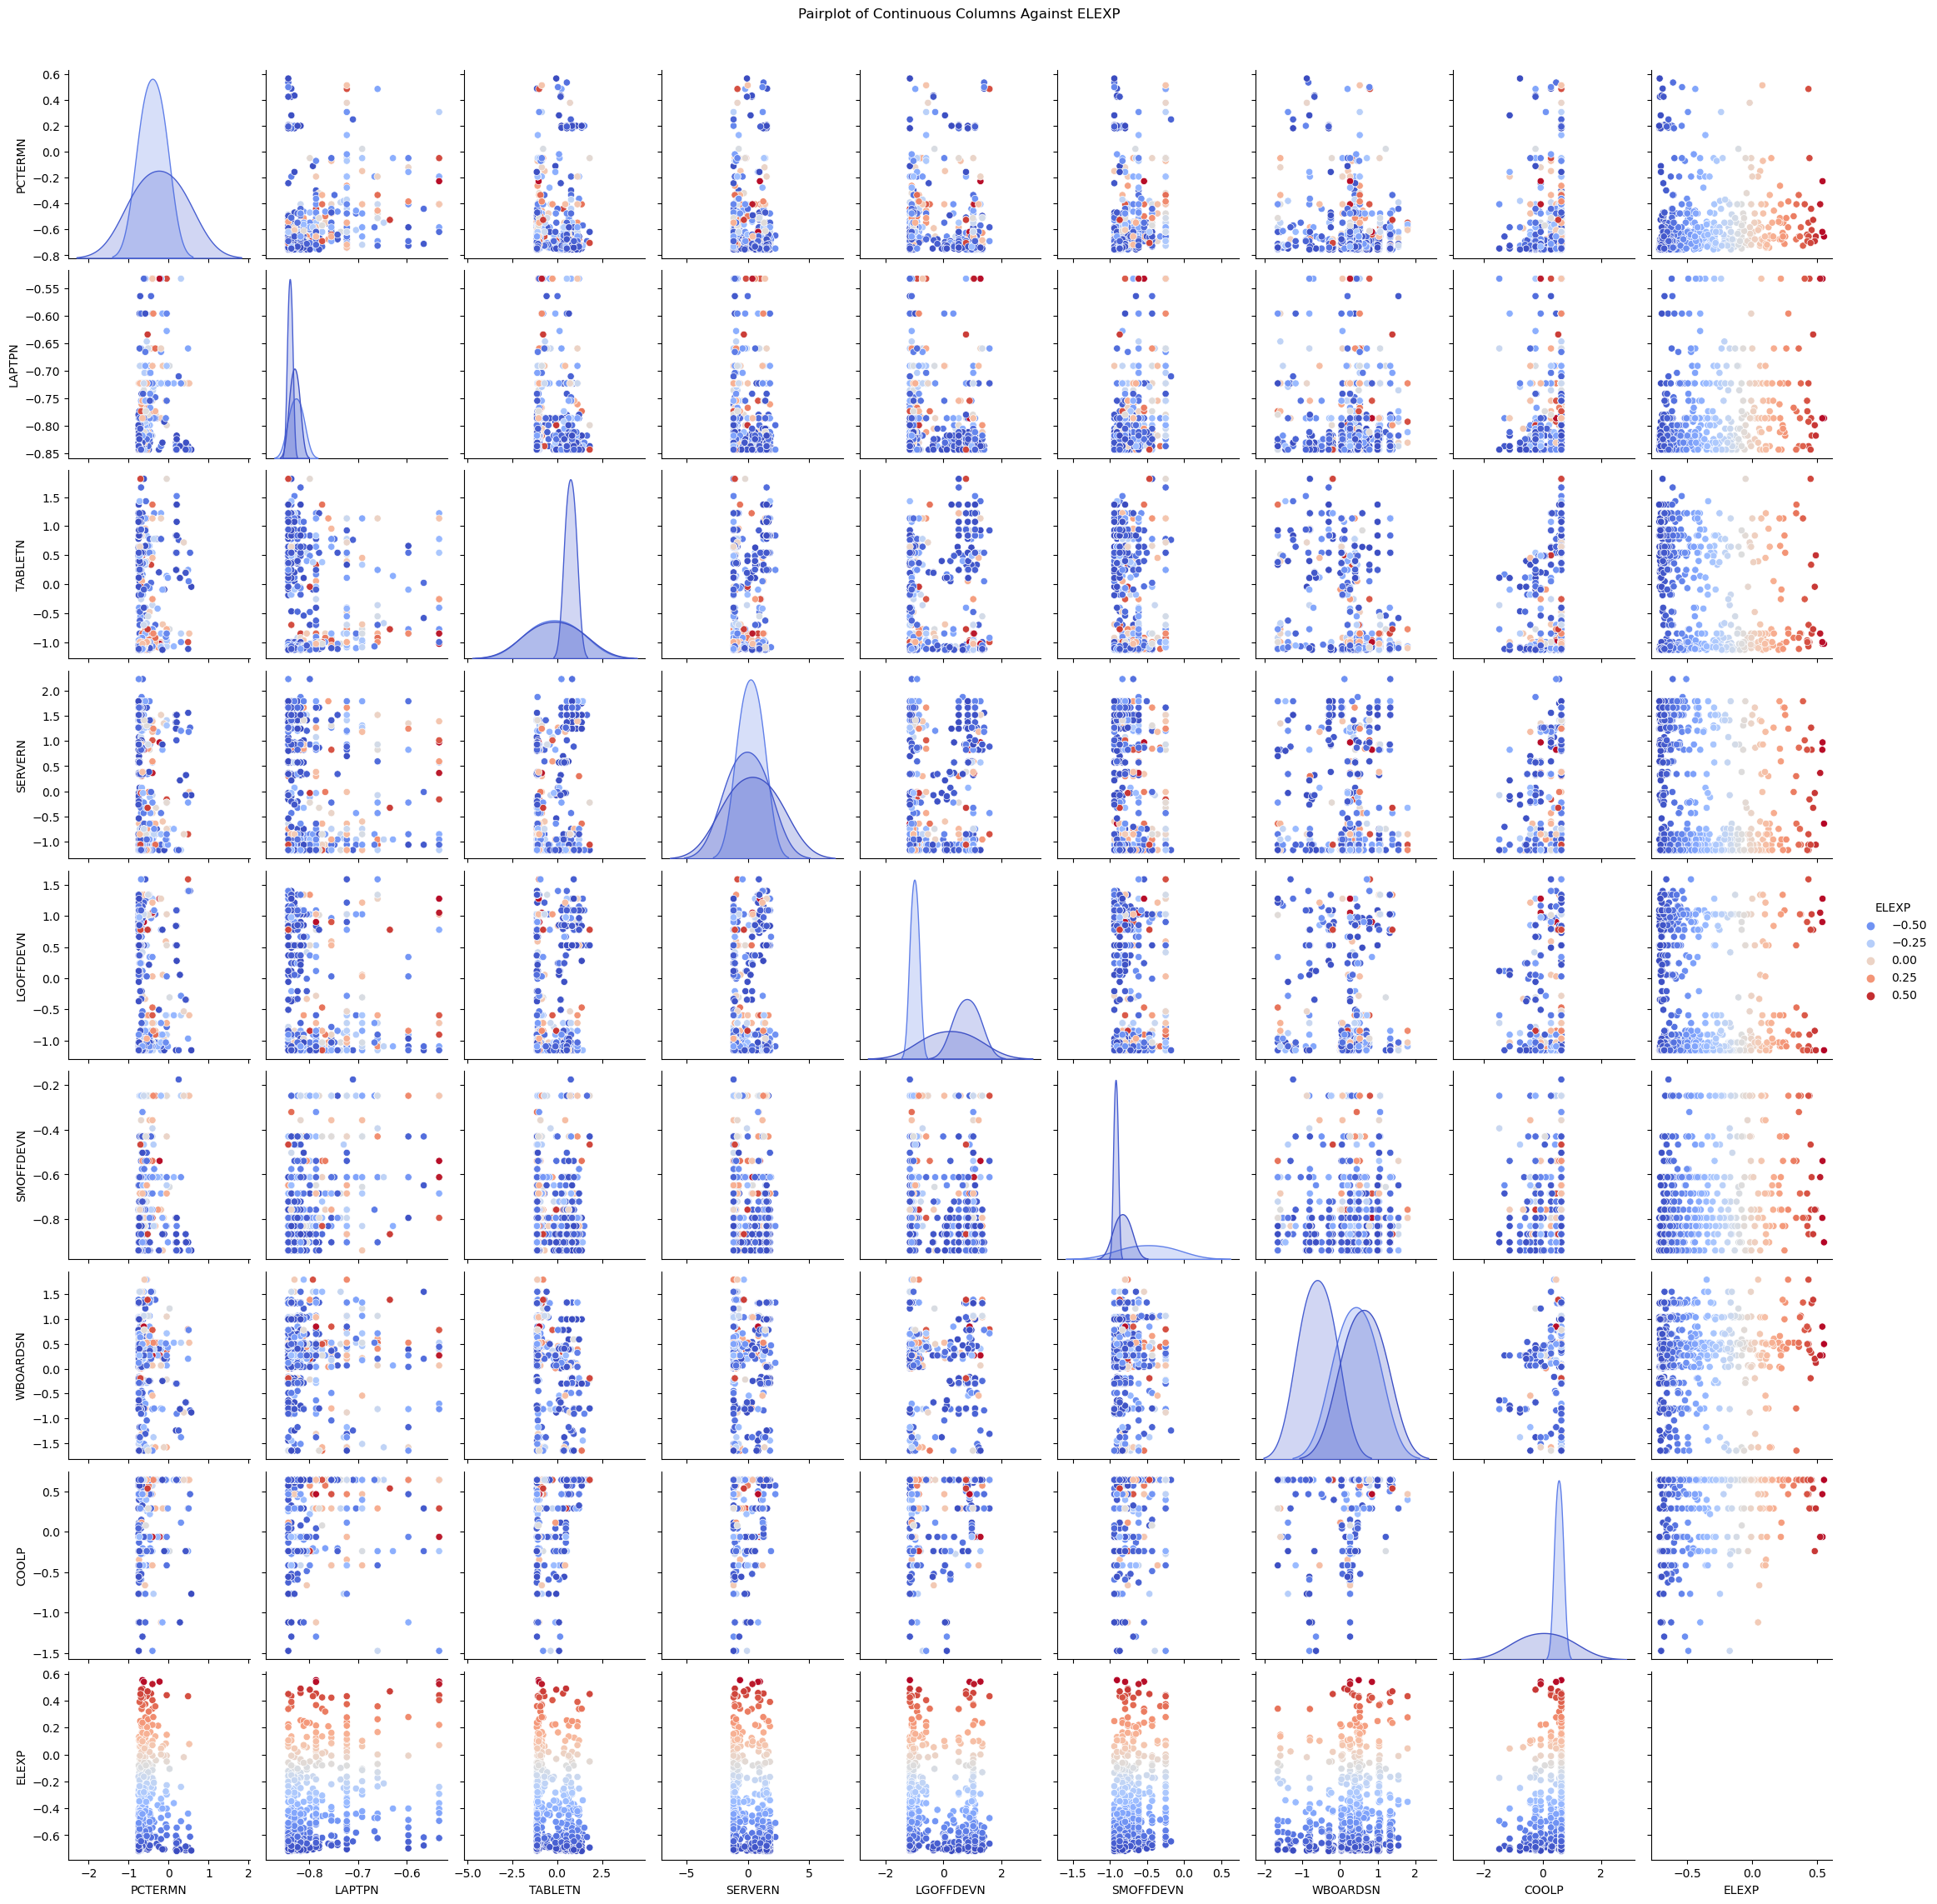

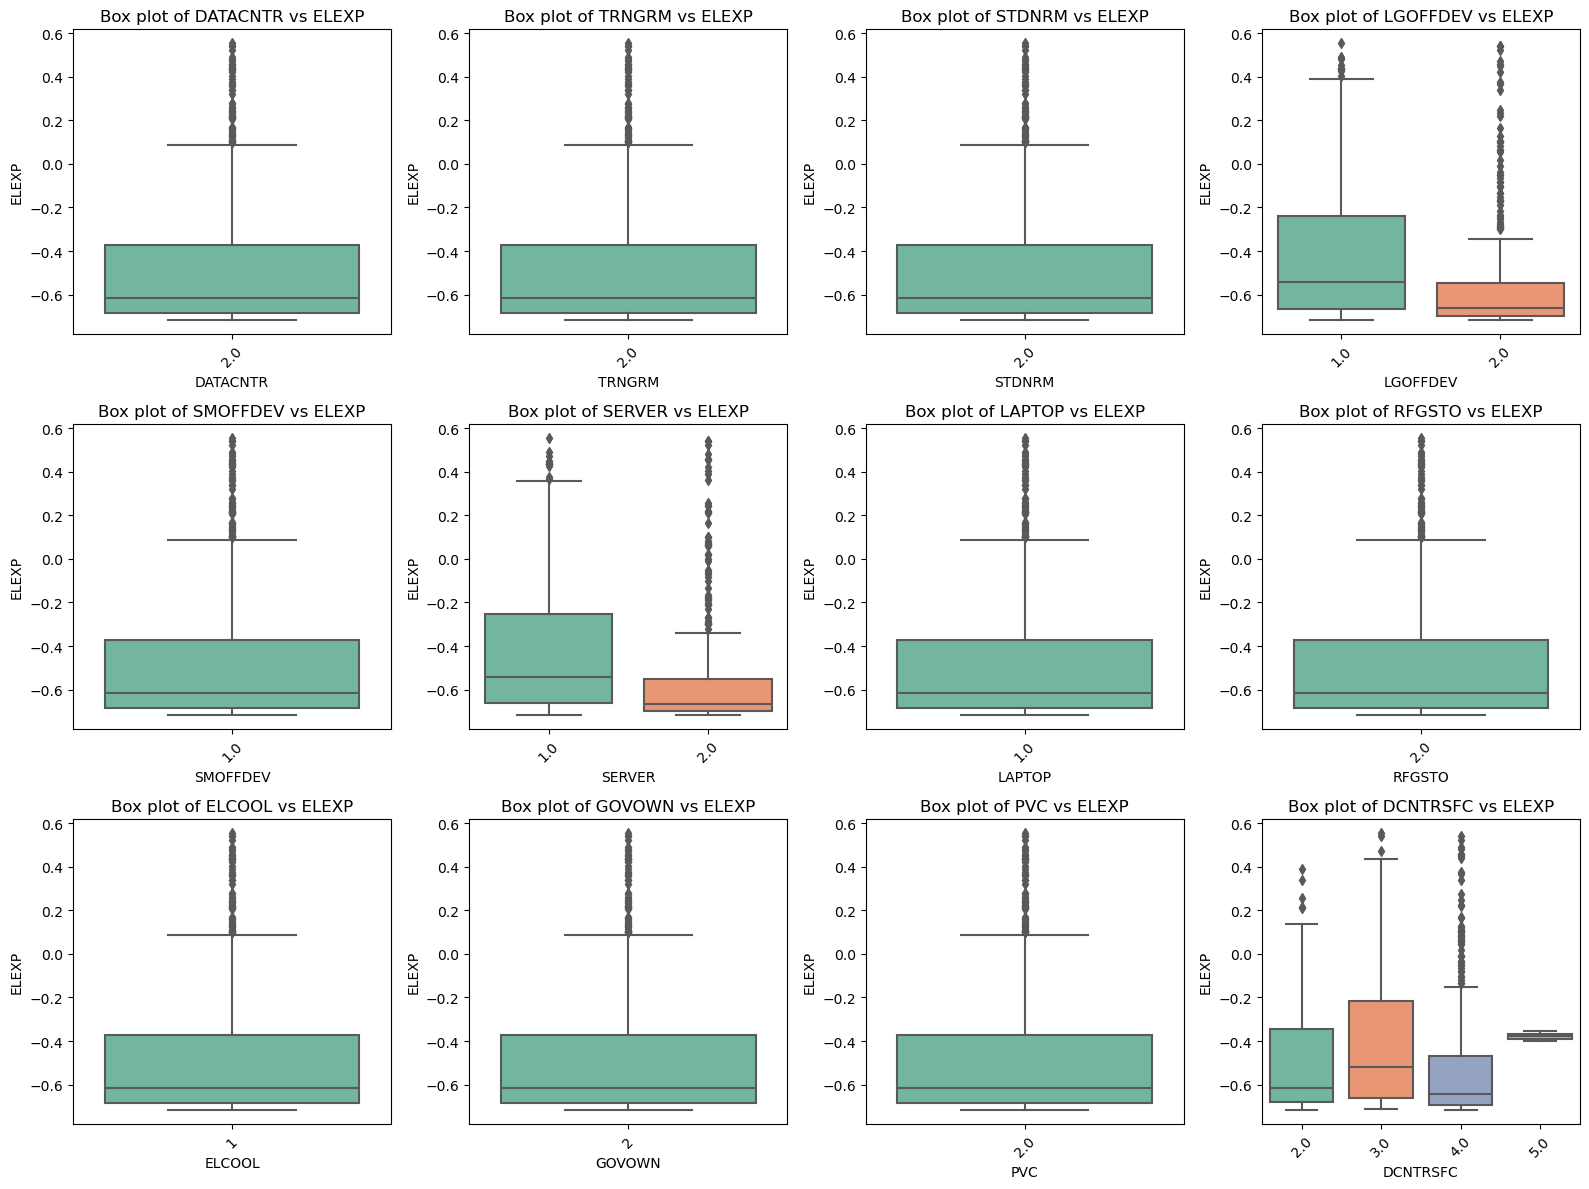

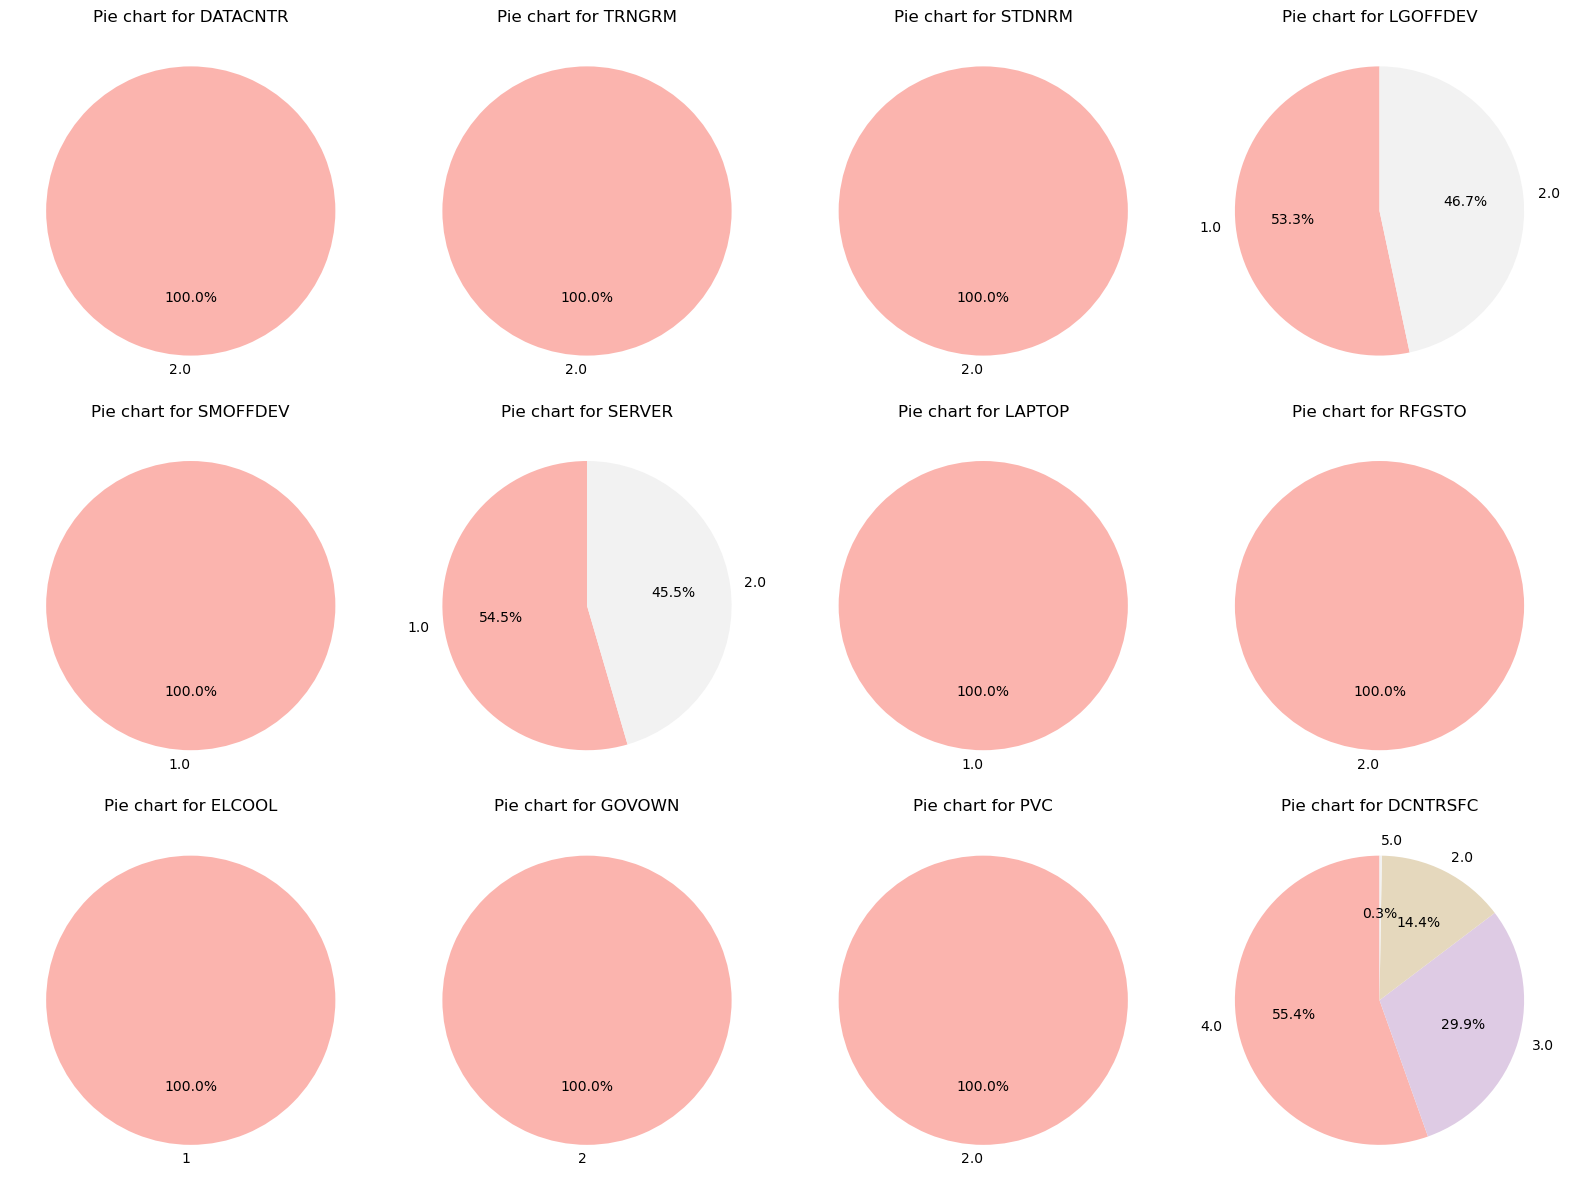

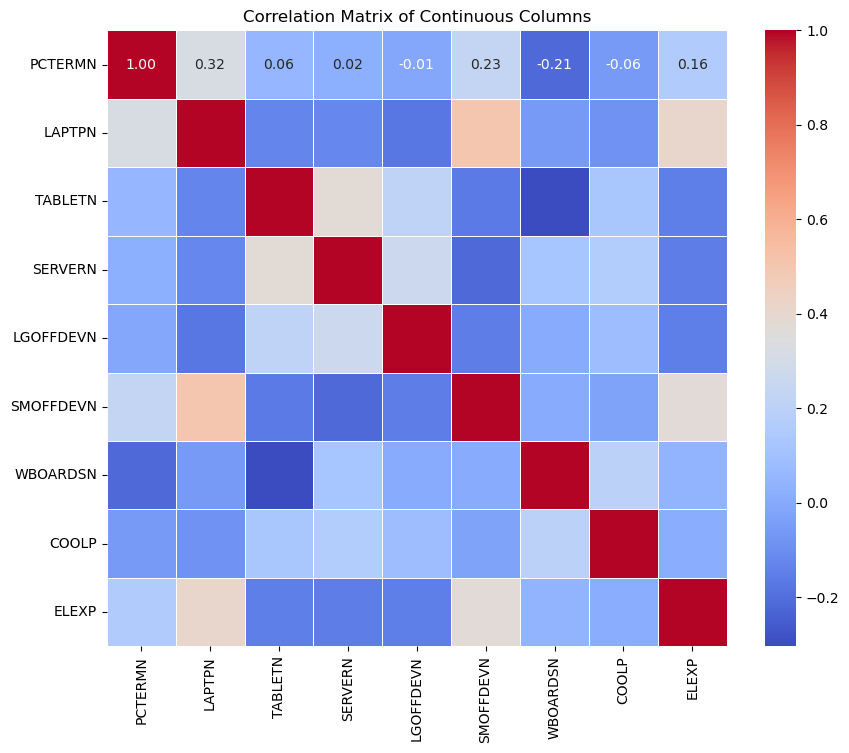

In [515]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

class DataExploration:
    def __init__(self, df, cat_cols, cont_cols, target_col):
        self.df = df.copy()
        self.cat_cols = cat_cols
        self.cont_cols = cont_cols
        self.target_col = target_col

    # 1. Plot Histograms for continuous columns
    def freedman_diaconis_bins(self, data):
        """Calculate optimal bin size using the Freedman-Diaconis rule"""
        iqr = np.percentile(data, 75) - np.percentile(data, 25)  # Interquartile range
        n = len(data)
        bin_width = 2 * iqr / n**(1/3)
        bins = int((data.max() - data.min()) / bin_width)
        return bins

    def plot_histograms(self):
        plt.figure(figsize=(14, 10))
        for i, col in enumerate(self.cont_cols):
            # Calculate optimal number of bins using Freedman-Diaconis rule
            bins = self.freedman_diaconis_bins(self.df[col].dropna())

            # Plot histogram with dynamic bins
            plt.subplot(3, 3, i + 1)
            sns.histplot(self.df[col], kde=True, bins=bins, color='skyblue')
            plt.title(f'Histogram of {col}')
        
        plt.tight_layout()
        plt.show()

    # 2. Pair plot for continuous columns vs ELEXP
    def plot_pairplot(self):
        sns.pairplot(self.df, vars=self.cont_cols, hue=self.target_col, palette='coolwarm')
        plt.suptitle("Pairplot of Continuous Columns Against ELEXP", y=1.02)
        plt.show()

    # 3. Box plot for categorical columns vs ELEXP
    def plot_boxplots(self):
        plt.figure(figsize=(16, 12))
        for i, col in enumerate(self.cat_cols):
            plt.subplot(3, 4, i + 1)
            sns.boxplot(x=self.df[col], y=self.df[self.target_col], palette='Set2')
            plt.title(f'Box plot of {col} vs ELEXP')
            plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    # 4. Pie charts for categorical columns
    def plot_pie_charts(self):
        plt.figure(figsize=(16, 12))
        for i, col in enumerate(self.cat_cols):
            plt.subplot(3, 4, i + 1)
            self.df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='Pastel1')
            plt.title(f'Pie chart for {col}')
            plt.ylabel('')
        plt.tight_layout()
        plt.show()

    # 5. Correlation matrix for continuous columns
    def plot_correlation_matrix(self):
        corr_matrix = self.df[self.cont_cols].corr()
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
        plt.title("Correlation Matrix of Continuous Columns")
        plt.show()

    # Combine all EDA functions into one call
    def perform_eda(self):
        self.plot_histograms()
        self.plot_pairplot()
        self.plot_boxplots()
        self.plot_pie_charts()
        self.plot_correlation_matrix()


# Example Usage:
# Create an instance of the DataExploration class and call the perform_eda function
# Assuming df is your DataFrame
import numpy as np

def remove_outliers(df):
    """
    Removes outliers in each column of the DataFrame using the IQR method.

    Args:
    - df: DataFrame from which outliers need to be removed.

    Returns:
    - df_no_outliers: DataFrame with outliers removed.
    """
    df_no_outliers = df.copy()
    
    for col in df_no_outliers.select_dtypes(include=np.number).columns:
        Q1 = df_no_outliers[col].quantile(0.25)
        Q3 = df_no_outliers[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remove outliers by filtering the rows
        df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]
    
    print(f"Shape of the data after removing outliers: {df_no_outliers.shape}")
    return df_no_outliers

# Removing outliers from df_imputed
df_no_outliers = remove_outliers(df_imputed)

eda = DataExploration(df_no_outliers, cat_cols, cont_cols, target_col="ELEXP")

# Perform the full EDA
eda.perform_eda()


In [511]:
df_imputed[target_col]

0       3.063255
1      -0.339425
2      -0.702484
3      -0.518543
4      -0.555156
          ...   
6352    0.191923
6353   -0.364584
6354    0.688424
6355   -0.599253
6356    0.299235
Name: ELEXP, Length: 6357, dtype: float64

In [516]:
import pandas as pd

def one_hot_encode(df, cat_cols, target_col):
    """
    Performs one-hot encoding on specified categorical columns and converts boolean to 1 and 0.

    Args:
    - df: DataFrame to encode.
    - cat_cols: List of categorical column names to one-hot encode.
    - target_col: The target column to exclude from encoding.

    Returns:
    - df_encoded: DataFrame with one-hot encoded columns (0 and 1).
    """
    df = df.copy()
    
    # Remove the target column from categorical columns
    cat_cols = [col for col in cat_cols if col != target_col]
    
    # Apply one-hot encoding using pandas get_dummies
    df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)
    
    # Convert boolean columns to 1 and 0
    for col in df_encoded.columns:
        if df_encoded[col].dtype == bool:  # Check if the column is boolean
            df_encoded[col] = df_encoded[col].astype(int)

    print(f"Shape after one-hot encoding: {df_encoded.shape}")
    
    return df_encoded

# Example usage
df_encoded = one_hot_encode(df_no_outliers, cat_cols, target_col)
df_encoded[target_col]

Shape after one-hot encoding: (763, 14)


2      -0.702484
3      -0.518543
32     -0.290272
36     -0.589043
50      0.254573
          ...   
6328   -0.708442
6329   -0.347207
6336   -0.659460
6345   -0.678529
6350   -0.644569
Name: ELEXP, Length: 763, dtype: float64

In [517]:
import pandas as pd
import statsmodels.api as sm

# Assuming df_encoded is the DataFrame after one-hot encoding
# and 'ELEXP' is the target variable for OLS regression

def run_ols(df_encoded, target_col):
    """
    Runs an OLS regression and finds significant features based on p-values.
    
    Args:
    - df_encoded: DataFrame containing encoded features and target column.
    - target_col: The name of the target column (dependent variable).
    
    Returns:
    - significant_features: List of features that are statistically significant.
    """
    # Step 1: Define the independent (X) and dependent (y) variables
    X = df_encoded.drop(columns=[target_col])  # Features
    y = df_encoded[target_col]  # Target variable
    
    # Step 2: Add a constant to the model (for the intercept)
    X = sm.add_constant(X)
    
    # Step 3: Fit the OLS model
    model = sm.OLS(y, X).fit()
    
    # Step 4: Get the summary of the regression
    summary = model.summary()
    print(summary)
    
    # Step 5: Find the significant features (p-value < 0.05)
    p_values = summary.tables[1].data[1:]  # Exclude the header row
    significant_features = [row[0] for row in p_values if float(row[4]) < 0.05]  # p-value < 0.05
    
    return significant_features

# Example usage:
significant_features = run_ols(df_encoded, target_col='ELEXP')
significant_features.remove("const")
print(f"Significant features: {significant_features}")


                            OLS Regression Results                            
Dep. Variable:                  ELEXP   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     16.99
Date:                Sat, 30 Nov 2024   Prob (F-statistic):           1.51e-34
Time:                        11:25:53   Log-Likelihood:                -58.159
No. Observations:                 763   AIC:                             144.3
Df Residuals:                     749   BIC:                             209.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.8578      0.138      6.221   

(153, 3)
Final MSE loss: 0.0718


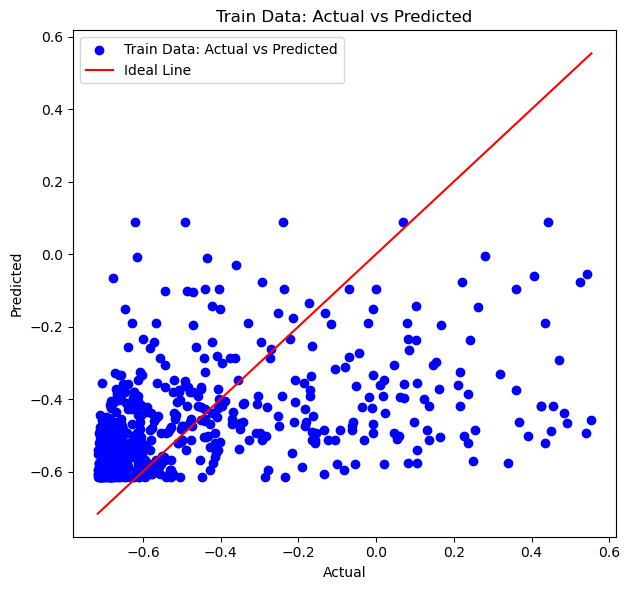

Train Accuracy: R2 = 0.2125, MSE = 0.0718
Test Accuracy: R2 = 0.1899, MSE = 0.0619


(0.21254745812607978,
 0.07180412535549371,
 0.18985312572908264,
 0.061869283514817734)

In [518]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

class LinearRegressionModel:
    def __init__(self, df, target_col):
        """
        Initialize the model with data and columns.
        df: DataFrame, data including both features and target
        target_col: str, the name of the target column (dependent variable)
        cat_cols: list, categorical columns (if any)
        cont_cols: list, continuous columns (if any)
        """
        self.df = df
        self.target_col = target_col
        
        # Prepare the feature and target matrices
        self.X = self.df.drop(columns=[self.target_col])
        self.y = self.df[target_col]
        
        # Initialize the model from sklearn
        self.model = LinearRegression()
        
    def fit(self, X_train, y_train):
        """
        Fit the linear regression model using sklearn's LinearRegression.
        X_train: Features for training
        y_train: Target variable for training
        """
        self.model.fit(X_train, y_train)
        
    def predict(self, X):
        """
        Predict the target variable for a given input matrix X.
        """
        return self.model.predict(X)

    def plot_metrics(self, X_train, y_train):
        """
        Plot loss over epochs and Test vs Predicted values.
        """
        # Make predictions
        train_pred = self.predict(X_train)
        
        # Plotting Loss (MSE) over epochs (since sklearn doesn't give per-epoch info, we use final loss)
        loss = mean_squared_error(y_train, train_pred)
        print(f'Final MSE loss: {loss:.4f}')

        # Test vs Predicted Plot
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.scatter(y_train, train_pred, color='blue', label='Train Data: Actual vs Predicted')
        plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', label='Ideal Line')
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.title('Train Data: Actual vs Predicted')
        plt.legend()

        plt.tight_layout()
        plt.show()

    def accuracy(self, X_train, y_train, X_test, y_test):
        """
        Calculate the R2, MSE, and Accuracy (train and test).
        """
        # Train accuracy
        train_pred = self.predict(X_train)
        train_r2 = r2_score(y_train, train_pred)
        train_mse = mean_squared_error(y_train, train_pred)
        
        # Test accuracy
        test_pred = self.predict(X_test)
        test_r2 = r2_score(y_test, test_pred)
        test_mse = mean_squared_error(y_test, test_pred)

        print(f'Train Accuracy: R2 = {train_r2:.4f}, MSE = {train_mse:.4f}')
        print(f'Test Accuracy: R2 = {test_r2:.4f}, MSE = {test_mse:.4f}')
        
        return train_r2, train_mse, test_r2, test_mse


# Example Usage:

# Assuming `df_encoded` is your preprocessed dataframe
target_col = 'ELEXP'  # target column in df_encoded

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_encoded[significant_features], df_encoded[target_col], test_size=0.2, random_state=42)
print(X_test.shape)
# Create and train the model
model = LinearRegressionModel(df_encoded, target_col)
model.fit(X_train, y_train)

# Plotting metrics and accuracy
model.plot_metrics(X_train, y_train)
model.accuracy(X_train, y_train, X_test, y_test)
